# Desafio
Grafos 2: Leitura de arquivo externo em formato de matriz (utilizar
mesmo arquivo da aula); gerar matrizes de incidência, similaridade e
coocorrência; gerar respectivos grafos.

Passo a passo

1.Ler o arquivo e obter a matriz

    1.1 Formatação para matriz

2.Gerar as demais matrizes

    2.1 Transpostar a original

    2.2 Multiplicá-las

3.Plotar em grafos

    3.1 Importar matrizes

    3.2 Desenhar e plotar o gráfico

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tkinter import filedialog

Leitura do arquivo:

In [3]:
caminho_arquivo=filedialog.askopenfilename()
arquivo=pd.read_table(caminho_arquivo,sep='\t')
arquivo

,Unnamed: 0,x,y,z,w,k
0,V1,0,1,1,1,1
1,V2,0,0,1,1,1
2,V3,1,1,0,0,0
3,V4,1,1,0,1,1


Formatação do dataframe para matriz:

In [3]:
rows=[]
for i in range(len(arquivo.index)):
    rows.append(arquivo.iloc[i].values)

data_base=[]
for i in range(len(arquivo.index)):
    data_base.append(rows[i][1:])
dt=pd.DataFrame(data=data_base,columns=(arquivo.columns[i+1] for i in range(len(arquivo.columns)-1)),index=(rows[i][0] for i in range(len(data_base))))
print('MATRIZ INCIDÊNCIA: ')
dt

MATRIZ INCIDÊNCIA: 


,x,y,z,w,k
V1,0,1,1,1,1
V2,0,0,1,1,1
V3,1,1,0,0,0
V4,1,1,0,1,1


In [4]:
data_base_t=[]
for i in range(len(dt.columns)):
    data_base_t.append(dt.iloc[:,i].values)
dt_t=pd.DataFrame(data=data_base_t,columns=(rows[i][0] for i in range(len(data_base))),index=(arquivo.columns[i+1] for i in range(len(arquivo.columns)-1)))
print('MATRIZ TRANSPOSTA:')
dt_t

MATRIZ TRANSPOSTA:


,V1,V2,V3,V4
x,0,0,1,1
y,1,0,1,1
z,1,1,0,0
w,1,1,0,1
k,1,1,0,1


In [5]:
mtz=dt.to_numpy()
sim=np.dot(mtz,mtz.T)

dt_s=pd.DataFrame(data=sim,columns=(rows[i][0] for i in range(len(rows))),index=(rows[i][0] for i in range(len(rows))))
print('MATRIZ DE SIMILARIDADE: ')
dt_s

MATRIZ DE SIMILARIDADE: 


,V1,V2,V3,V4
V1,4,3,1,3
V2,3,3,0,2
V3,1,0,2,2
V4,3,2,2,4


In [6]:
coo=np.dot(mtz.T,mtz)

dt_c=pd.DataFrame(data=coo,columns=(arquivo.columns[i+1] for i in range(len(arquivo.columns)-1)),index=(arquivo.columns[i+1] for i in range(len(arquivo.columns)-1)))
print('MATRIZ DE COOCORRÊNCIA: ')
dt_c

MATRIZ DE COOCORRÊNCIA: 


,x,y,z,w,k
x,2,2,0,1,1
y,2,3,1,2,2
z,0,1,2,2,2
w,1,2,2,3,3
k,1,2,2,3,3


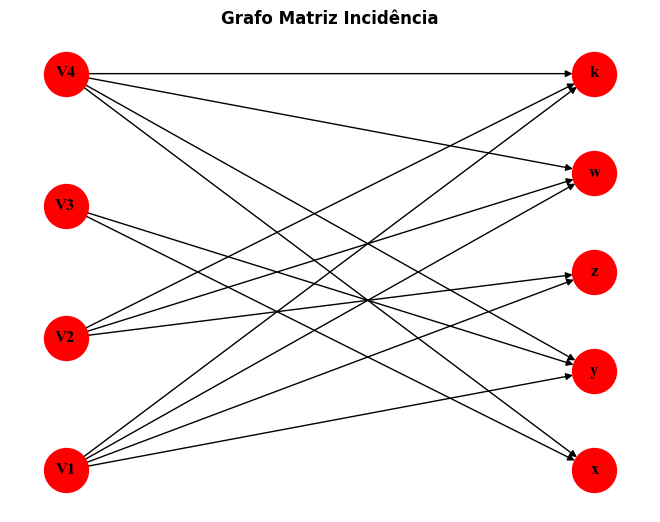

In [7]:
g_inc=nx.DiGraph()
g_inc.add_nodes_from(dt.index)
g_inc.add_nodes_from(dt.columns)

for i in dt.index:
    for n in dt.columns:
        if dt.loc[i, n]!=0:
            g_inc.add_edge(i, n)
            
nx.draw(g_inc,nx.bipartite_layout(g_inc,dt.index), with_labels=True, node_size=1000, node_color='red', font_family='Times New Roman',font_weight='bold')
plt.title('Grafo Matriz Incidência',fontweight='bold')
plt.show()

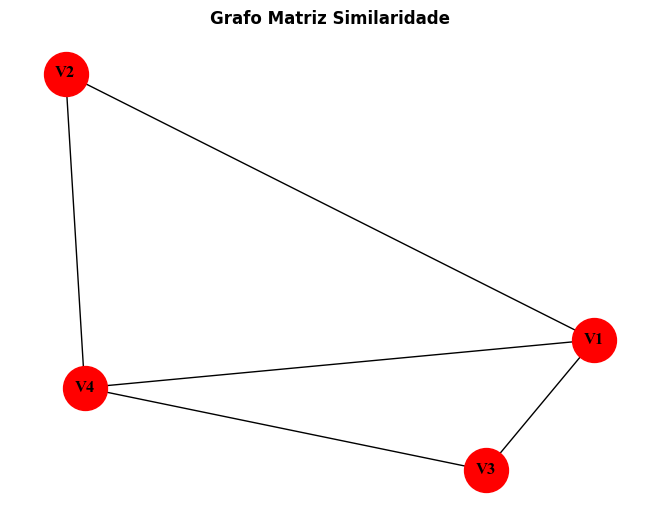

In [8]:
g_sim=nx.from_pandas_adjacency(dt_s)
g_sim.remove_edges_from(nx.selfloop_edges(g_sim))
nx.draw(g_sim,nx.kamada_kawai_layout(g_sim),with_labels=True,node_size=1000,node_color='red',font_family='Times New Roman',font_weight='bold')
plt.title('Grafo Matriz Similaridade',fontweight='bold')
plt.show()

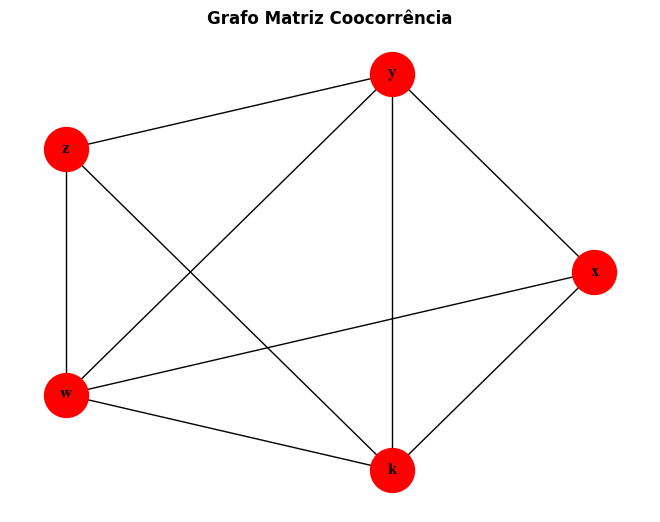

In [9]:
g_coo=nx.from_pandas_adjacency(dt_c)
g_coo.remove_edges_from(nx.selfloop_edges(g_coo))
nx.draw(g_coo,nx.circular_layout(g_coo),with_labels=True,node_size=1000,node_color='red',font_family='Times New Roman',font_weight='bold')
plt.title('Grafo Matriz Coocorrência',fontweight='bold')
plt.show()